In [45]:
import pandas as pd #data frame library
import matplotlib.pyplot as plt #support ploting 

%matplotlib inline

## Loading dan Review Data

In [46]:
df = pd.read_csv("./data/Data.csv")

In [10]:
df.shape # liat ukuran

(10, 4)

In [11]:
(768, 10)

(768, 10)

In [12]:
df.head(5)

,Negara,Umur,Gaji,Transaksi
0,Jakarta,44.0,8000000.0,Tidak
1,Bandung,27.0,6500000.0,Ya
2,Surabaya,30.0,4500000.0,Tidak
3,Bandung,38.0,7500000.0,Tidak
4,Surabaya,40.0,NaN,Ya


In [13]:
df.tail(5) #mengambil 5 data terakhir

,Negara,Umur,Gaji,Transaksi
5,Jakarta,35.0,10000000.0,Ya
6,Bandung,NaN,8250000.0,Tidak
7,Jakarta,48.0,9750000.0,Ya
8,Surabaya,50.0,7674000.0,Tidak
9,Jakarta,37.0,6700000.0,Ya


In [14]:
df.isnull().values.any() #kalo ada data kosong

True

In [15]:
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xtcks(range(len(corr.columns)), corr.columns)
    plt.ytcks(range(len(corr.columns)), corr.columns)

C:\Users\IHBS TV\AppData\Local\Temp\ipykernel_9384\1335132026.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


AttributeError: module 'matplotlib.pyplot' has no attribute 'xtcks'

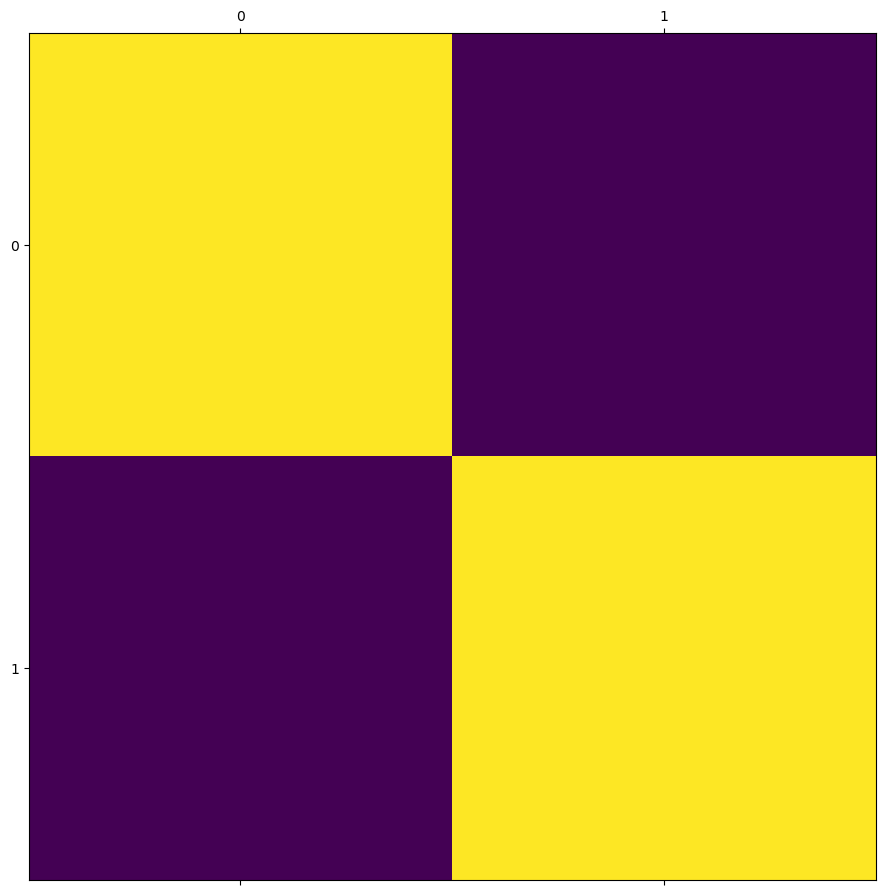

In [16]:
plot_corr(df)

In [17]:
df.corr()

C:\Users\IHBS TV\AppData\Local\Temp\ipykernel_9384\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Umur,Gaji
Umur,1.000000,0.542429
Gaji,0.542429,1.000000


In [18]:
del df['Gaji']

In [19]:
df.head(5)

,Negara,Umur,Transaksi
0,Jakarta,44.0,Tidak
1,Bandung,27.0,Ya
2,Surabaya,30.0,Tidak
3,Bandung,38.0,Tidak
4,Surabaya,40.0,Ya


In [39]:
Transaksi_map = { True: 1, False: 0}
df['Transaksi'] = df['Transaksi'].map(Transaksi_map)

In [40]:
df.head(5)

,Negara,Umur,Transaksi
0,Jakarta,44.0,NaN
1,Bandung,27.0,NaN
2,Surabaya,30.0,NaN
3,Bandung,38.0,NaN
4,Surabaya,40.0,NaN


In [22]:
df.isnull().values.any()

True

In [23]:
num_obs = len(df)
num_true = len(df.loc[df['Transaksi'] == 1])
num_false = len(df.loc[df['Transaksi'] == 0])
print("Jumlah Transaksi Ok: {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs) * 100))
print("Jumlah Transaksi Tidak Ok: {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs) * 100))

Jumlah Transaksi Ok: 0 (0.00%)
Jumlah Transaksi Tidak Ok: 0 (0.00%)


In [29]:
from sklearn.model_selection import train_test_split
feature_col_names = ['Negara', 'Umur']
predicted_class_names = ['Transaksi']

X = df[feature_col_names].values
y = df[predicted_class_names].values
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state = 42)

In [31]:
print("{0:0.2f}% ada pada training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% ada pada test set".format((len(X_test)/len(df.index)) * 100))


70.00% ada pada training set
30.00% ada pada test set


In [37]:
print("Jumlah Transaksi Original: {0} ({1:2.2f}%)".format(len(df.loc[df['Transaksi']== 1]), (len(df.loc[df['Transaksi']== 1])/ len(df.index)) * 100.0))
print("Jumlah Transaksi Tidak Original: {0} ({1:2.2f}%)".format(len(df.loc[df['Transaksi']== 0]), (len(df.loc[df['Transaksi']== 0])/ len(df.index)) * 100.0))
print("")
print("Training True : {0} ({1:2.2f}%)".format(len(y_train[y_train[:]== 1]), (len(y_train[y_train[:]== 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:2.2f}%)".format(len(y_train[y_train[:]== 0]), (len(y_train[y_train[:]== 0])/len(y_train) * 100.0)))
print("")
print("Training True : {0} ({1:2.2f}%)".format(len(y_test[y_test[:]== 1]), (len(y_test[y_test[:]== 1])/len(y_test) * 100.0)))
print("Training False : {0} ({1:2.2f}%)".format(len(y_test[y_test[:]== 0]), (len(y_test[y_test[:]== 0])/len(y_test) * 100.0)))

Jumlah Transaksi Original: 0 (0.00%)
Jumlah Transaksi Tidak Original: 0 (0.00%)

Training True : 0 (0.00%)
Training False : 0 (0.00%)

Training True : 0 (0.00%)
Training False : 0 (0.00%)


In [64]:
df.head()

,Negara,Umur,Gaji,Transaksi
0,Jakarta,44.0,8000000.0,Tidak
1,Bandung,27.0,6500000.0,Ya
2,Surabaya,30.0,4500000.0,Tidak
3,Bandung,38.0,7500000.0,Tidak
5,Jakarta,35.0,10000000.0,Ya


In [65]:
print("# rows in dataframe {0}".format(len(df)))
print("# rows missing Negara: {0}".format(len(df.loc[df['Negara'] == 0])))
print("# rows missing Umur: {0}".format(len(df.loc[df['Umur'] == 0])))

# rows in dataframe 8
# rows missing Negara: 0
# rows missing Umur: 0


In [63]:
from sklearn.impute import SimpleImputer
fill_0 = SimpleImputer(missing_values = 0, strategy = "mean")
X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

ValueError: Input X contains NaN.
SimpleImputer does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [44]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Menggunakan LabelEncoder untuk mengonversi kolom 'Negara'
label_encoder = LabelEncoder()
X_train[:, 0] = label_encoder.fit_transform(X_train[:, 0])
X_test[:, 0] = label_encoder.transform(X_test[:, 0])

# Menggunakan SimpleImputer dengan strategi mean pada data numerik
fill_0 = SimpleImputer(missing_values=0, strategy="mean")
X_train = fill_0.fit_transform(X_train)
X_test = fill_0.transform(X_test)


ValueError: Input X contains NaN.
SimpleImputer does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [47]:
df.dropna(inplace=True)

In [48]:
df.fillna(df.mean(), inplace=True)

C:\Users\IHBS TV\AppData\Local\Temp\ipykernel_9384\820435583.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [49]:
df.head()

,Negara,Umur,Gaji,Transaksi
0,Jakarta,44.0,8000000.0,Tidak
1,Bandung,27.0,6500000.0,Ya
2,Surabaya,30.0,4500000.0,Tidak
3,Bandung,38.0,7500000.0,Tidak
5,Jakarta,35.0,10000000.0,Ya


In [51]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

ValueError: Input y contains NaN.

In [52]:
import numpy as np

# Menghapus baris yang mengandung nilai NaN pada y_train
X_train = X_train[~np.isnan(y_train)]
y_train = y_train[~np.isnan(y_train)]

# Membuat dan melatih model Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train.ravel())

IndexError: boolean index did not match indexed array along dimension 1; dimension is 2 but corresponding boolean dimension is 1

In [53]:
import numpy as np

# Membuat mask untuk mengidentifikasi baris dengan nilai NaN
mask = ~np.isnan(y_train)

# Mengaplikasikan mask pada X_train dan y_train
X_train = X_train[mask]
y_train = y_train[mask]

# Membuat dan melatih model Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train.ravel())


IndexError: boolean index did not match indexed array along dimension 1; dimension is 2 but corresponding boolean dimension is 1

In [54]:
# uji akurasi
nb_predict_train = nb_model.predict(X_train)

from sklearn import metrics
print ("Accuracy: {0:4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))

NotFittedError: This GaussianNB instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [55]:
nb_predict_test = nb_model.predict(X_test)
from sklearn import metrics

print("nb_predict_test", nb_predict_test)
print("y_test", y_test)
print("Accuracy, {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

NotFittedError: This GaussianNB instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [56]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("")
print("Classification Reports")
print(metrics.classification_report(y_test, nb_predict_test))

Confusion Matrix


NameError: name 'metrics' is not defined

In [60]:
# peningkatan performa
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42, n_estimators=10)
rf_model.fit(X_train, y_train.ravel())

ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [61]:
rf_predict_train = rf_model.predict(X_train)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [62]:
rf_predict_train = rf_model.predict(X_test)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [66]:
print(metrics.confusion_matrix(y_test, rf_predict_test))
print("")
print("Classification Reports")
print(metrics.classification_report(y_test, rf_predict_test))

NameError: name 'metrics' is not defined

In [67]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.7, random_state=42, solver='liblinear', max_iter=10000)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test))
print("")
print("Classification Reports")
print(metrics.classification_report(y_test, nb_predict_test))

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [68]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, class_weight="balance", random_state=42, solver='liblinear')
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc
    
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max values of {0:.3f} occured at C={1:.3f}".format(best_recall_recall_score, best_score_C_val))

%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C Value")
plt.ylabel("recall score")

InvalidParameterError: The 'class_weight' parameter of LogisticRegression must be an instance of 'dict', a str among {'balanced'} or None. Got 'balance' instead.

In [69]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(C=C_val, class_weight="balance", random_state=42, solver='liblinear')
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model_loop.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test))
print("")
print("Classification Reports")
print(metrics.classification_report(y_test, lr_predict_test))
print(metrics.recall_score(y_test, lr_predict_test))

InvalidParameterError: The 'class_weight' parameter of LogisticRegression must be an instance of 'dict', a str among {'balanced'} or None. Got 'balance' instead.

In [70]:
# Cross Validation
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs = -1, random_state = 42, Cs = 3, cv = 10, refit = False, class_weight ="balanced", max_iter = 500)
lr_cv_model.fit(X_train, y_train.ravel())

ValueError: Input X contains NaN.
LogisticRegressionCV does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [71]:
lr_cv_predict_test = lr_cv_model.predict(X_test)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test))
print("")
print("Classification Reports")
print(metrics.classification_report(y_test, lr_predict_test))

NotFittedError: This LogisticRegressionCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [72]:
from sklearn.externals import joblib
joblib.dump(lr_cv_model, "./data/kode-trained-model.pkl")

ImportError: cannot import name 'joblib' from 'sklearn.externals' (D:\ProgramFiles\Anaconda\lib\site-packages\sklearn\externals\__init__.py)

In [73]:
lr_cv_model = joblib.load("./data/kode-trained-model.pkl")

NameError: name 'joblib' is not defined